# Compute the Stopping Distance for a Projectile
Compute the stopping distance of a projectile using the multi-velocity machine learning model.

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import os
import sys
sys.path.append(f"{os.getcwd()}/../../")
# os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
# from stopping_power_ml.stop_distance import StoppingDistanceComputer
# from stopping_power_ml.integrator import TrajectoryIntegrator
import pickle as pkl
import pandas as pd
import numpy as np
# import keras
import os
from glob import glob
import h5py 

#plt.style.use(['notebook', 'no-latex'])

## Load in the Model and Featurizer
The model is saved in Keras h5, and the featurizer is in the root directory

In [3]:
# with open(os.path.join('..', 'featurizer.pkl'), 'rb') as fp:
#     featurizers = pkl.load(fp)

# start_frame = pkl.load(open(os.path.join('..', '..', 'al_starting_frame.pkl'), 'rb'))

# channel_data = pd.read_pickle(os.path.join('..', '..', 'single-velocity', 'data', 'channel_data.pkl.gz')).query('average_range')

min_velocity = pd.read_pickle(os.path.join('..', '..', 'training_data.pkl.gz'))['velocity_mag'].min()
max_velocity = pd.read_pickle(os.path.join('..', '..', 'training_data.pkl.gz'))['velocity_mag'].max()
print(min_velocity, max_velocity)

0.49999965530500606 4.000000001113168


In [17]:
#file_all = glob('./all_traj/*/traj.h5')
file_all = glob('./all_traj/11793*/traj.h5')
traj_all = []
info_all = []
for hdf5_file in file_all:
    print(hdf5_file)

    with pd.HDFStore(hdf5_file, mode='r') as store:
        keys = store.keys()
        for key in keys:
            # Read the DataFrame
            traj_all.append(store.get(key))
            
            # Read the attributes
            attrs = store.get_storer(key).attrs
            info = attrs.traj_info
            info_all.append(info)
            print(f'DataFrame {key} attributes: {info}')
            print()

    print("DataFrames and their attributes have been read from the HDF5 file.")


./all_traj/11793773/traj.h5
DataFrame /traj_0 attributes: {'start_pos': array([0.  , 0.75, 0.75]), 'start_vel': array([4., 0., 0.]), 'rtol': 1e-06, 'atol': 1e-06, 'stepper': 'rk45', 'max_time_step': 10, 'proj_mass': 1837, 'model': '../random_models/double_model48.h5', 'timestamp': '2024-06-27T01:58:10.542810'}

DataFrames and their attributes have been read from the HDF5 file.
./all_traj/11793771/traj.h5
DataFrame /traj_0 attributes: {'start_pos': array([0.  , 0.75, 0.75]), 'start_vel': array([4., 0., 0.]), 'rtol': 1e-06, 'atol': 1e-06, 'stepper': 'rk45', 'max_time_step': 10, 'proj_mass': 1837, 'model': '../random_models/single_model.h5', 'timestamp': '2024-06-27T01:58:09.866304'}

DataFrames and their attributes have been read from the HDF5 file.


{'start_pos': array([0.  , 0.75, 0.75]), 'start_vel': array([4., 0., 0.]), 'rtol': 1e-06, 'atol': 1e-06, 'stepper': 'rk45', 'max_time_step': 10, 'proj_mass': 1837, 'model': '../random_models/double_model48.h5', 'timestamp': '2024-06-27T01:58:10.542810'}
{'start_pos': array([0.  , 0.75, 0.75]), 'start_vel': array([4., 0., 0.]), 'rtol': 1e-06, 'atol': 1e-06, 'stepper': 'rk45', 'max_time_step': 10, 'proj_mass': 1837, 'model': '../random_models/single_model.h5', 'timestamp': '2024-06-27T01:58:09.866304'}


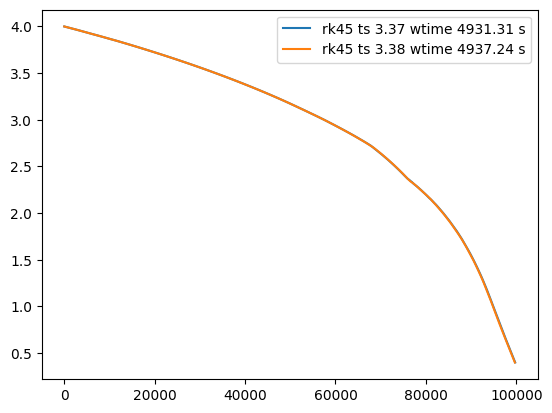

In [18]:
def sel_func(info):
    sel_stepper = info['stepper'] == 'rk45' # or info['stepper'] == 'velocity_verlet' info['stepper'].lower() == 'lsoda' 
    sel_pos = np.allclose(info['start_pos'], np.array([0.0, 0.75, 0.75])) == True
    sel_rtol = 1 #info['rtol'] < 2e-5 if info['stepper'] == 'rk45' else info['rtol'] < 9e-
    return sel_pos and sel_stepper and sel_rtol

for i in range(len(traj_all)):
    info = info_all[i]
    if (sel_func(info)):
        print(info)
        wtime = traj_all[i]['sim_time'].to_numpy()
        wtime = wtime[-1]
        t = traj_all[i]['time'].to_numpy()
        ts = np.mean(t[1:] - t[:-1])
        disp = traj_all[i]['displacement'].to_numpy()
        vel = traj_all[i]['velocity'].to_numpy()
        # sel = np.where(disp < 10000)
        
        plt.figure(1)
        # plt.plot(t[sel], disp[sel], label = f"{info_all[i]['stepper']} ts {ts:0.2f} wtime {wtime:0.2f} s")
        plt.plot(disp, vel, label = f"{info_all[i]['stepper']} ts {ts:0.2f} wtime {wtime:0.2f} s")
        
        # plt.figure("ts")
        # plt.plot(ts)
plt.figure(1)
plt.legend()